In [1]:
#importing libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm # import statsmodels 

In [2]:
#importing dataset
os.chdir('C:/Users/emrem/OneDrive/Masaüstü/Python/Kaggle_Telco/')
data = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
##################
#DATA OVERVIEW
##################
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
##################
#DATA MANIPULATION
##################

data["TotalCharges"] = pd.to_numeric(data.TotalCharges, errors='coerce') 
data["SeniorCitizen"] = data["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [5]:
# counting null values
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
TotalCharges,11,0.156183
Churn,0,0.000000
OnlineSecurity,0,0.000000
gender,0,0.000000
SeniorCitizen,0,0.000000
Partner,0,0.000000
Dependents,0,0.000000
tenure,0,0.000000
PhoneService,0,0.000000
MultipleLines,0,0.000000


In [6]:
#removing null rows
data= data.dropna()

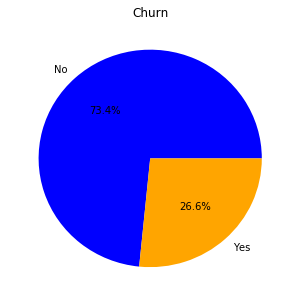

In [7]:
##########################
#EXPLORATORY DATA ANALYSIS
##########################
#TARGET 
labels = data.Churn.value_counts().index
colors = ["blue","orange"]
explode = [0,0]
sizes = data.Churn.value_counts().values
#visualization
plt.figure(figsize=(5,5))
plt.pie(sizes,colors=colors,explode=explode,labels=labels,autopct="%1.1f%%")
plt.title("Churn")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2b007a20748>,
 'caps': [<matplotlib.lines.Line2D at 0x2b007a20f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b007a201d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b007a2e828>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b007a2ec50>],
 'means': []}

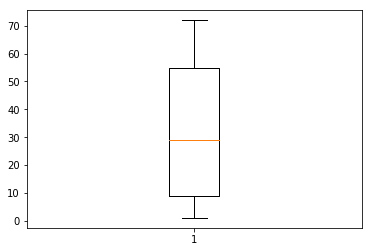

In [8]:
#BOX PLOT
plt.boxplot(data['tenure'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2b007a94c88>,
 'caps': [<matplotlib.lines.Line2D at 0x2b007a75518>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b007a94748>],
 'medians': [<matplotlib.lines.Line2D at 0x2b007a75d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b007a75e48>],
 'means': []}

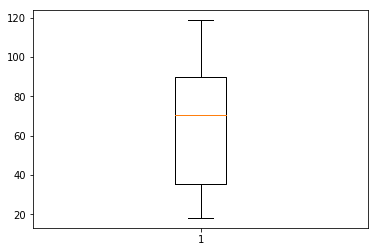

In [9]:
plt.boxplot(data['MonthlyCharges'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2b007af6630>,
 'caps': [<matplotlib.lines.Line2D at 0x2b007af6e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b007af60f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b007afe710>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b007afeb38>],
 'means': []}

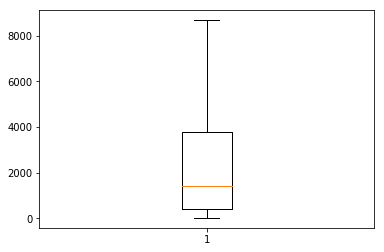

In [10]:
plt.boxplot(data['TotalCharges'])

In [11]:
#OUTLIER DETECTION
data["z_MonthlyCharges"]=np.abs(stats.zscore(data['MonthlyCharges']))
data["z_MonthlyCharges"]=data[(np.abs(stats.zscore(data['MonthlyCharges'])) < 3)]
data["z_TotalCharges"]=np.abs(stats.zscore(data['TotalCharges']))
data["z_TotalCharges"]=data[(np.abs(stats.zscore(data['TotalCharges'])) < 3)]
data["z_tenure"]=np.abs(stats.zscore(data['tenure']))
data["z_tenure"]=data[(np.abs(stats.zscore(data['tenure'])) < 3)]

#OUTLIERS DELETED
data=data.dropna()

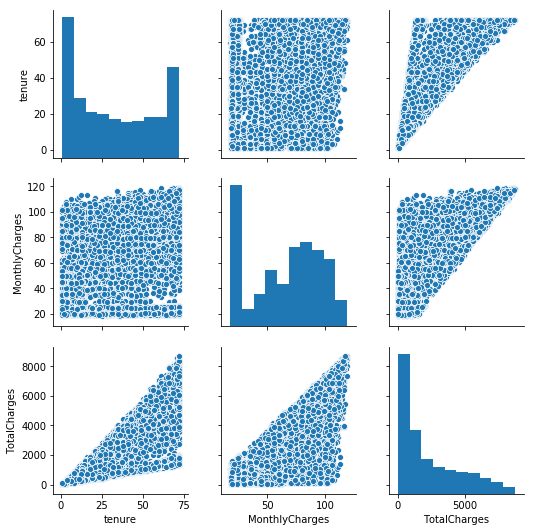

In [12]:
#MULTIPLE SCATTER  
cols = ['tenure','MonthlyCharges','TotalCharges']
sns.pairplot(data[cols])
plt.show()

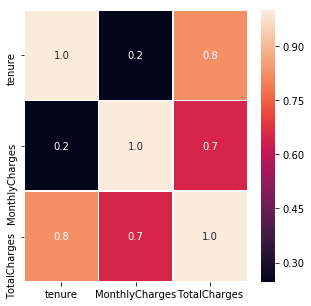

In [13]:
#CORRELATION HEATMAP
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [14]:
#çoklu doğrusal bağlantının incelenmesi

V = data[["tenure","TotalCharges","MonthlyCharges"]] # independent variables
#VIF(variance inflacion factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(V.values, i) for i in range(V.shape[1])]
vif["features"] = V.columns
vif.round(1)

,VIF Factor,features
0,6.3,tenure
1,8.1,TotalCharges
2,3.4,MonthlyCharges


In [15]:
#Soru kategorilerine göre PCA yapılmıştır.
PCA_Charges = data[["TotalCharges","MonthlyCharges","tenure"]]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
PCA_Charges = sc.fit_transform(PCA_Charges)  

from sklearn.decomposition import PCA

pca = PCA(n_components=3)  
PCA_Charges = pca.fit_transform(PCA_Charges)  
explained_variance = pca.explained_variance_ratio_ 

explained_variance

array([0.72659927, 0.25358707, 0.01981367])

In [16]:
print(pd.DataFrame(pca.components_,columns=data[["TotalCharges","MonthlyCharges","tenure"]].columns,index = ['Charges_PCA-1','Charges_PCA-2','Tenure_PCA-3']))

               TotalCharges  MonthlyCharges    tenure
Charges_PCA-1      0.665097        0.485714  0.567211
Charges_PCA-2      0.061020       -0.792375  0.606975
Tenure_PCA-3      -0.744260        0.369086  0.556644


In [17]:
data['Charges_PCA-1'] = PCA_Charges[:, 0]
data['Charges_PCA-2'] = PCA_Charges[:, 1]
data['Tenure_PCA-3'] = PCA_Charges[:, 2]

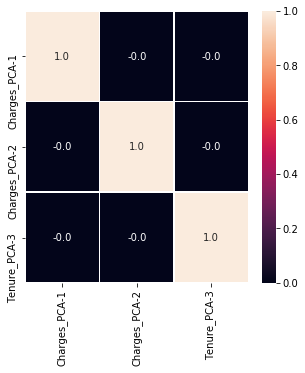

In [18]:
#CORRELATION HEATMAP
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data[["Charges_PCA-1","Charges_PCA-2","Tenure_PCA-3"]].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [19]:
#CORRELATION BETWEEN CATEGORICAL VARIABLES -- Cramers V
import scipy.stats as ss
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

    confusion_matrix = pd.crosstab(data["Partner"], data["Churn"]).as_matrix()
    cramers_v(confusion_matrix)
    
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(confusion_matrix, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

In [21]:
colname = V.columns
colname

Index(['tenure', 'TotalCharges', 'MonthlyCharges'], dtype='object')

In [22]:
#tüm analizlerin doğruluğunu spss'te incele--soruna bak

#lets check that if our variables distribution is normal
# Shapiro-Wilk Test
from numpy.random import seed
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# normality test
for i in colname:
    stat, p = shapiro(data[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
    alpha = 0.05
    if p > alpha:
        print('Sample %s looks Gaussian (fail to reject H0)' %i)
    else:
        print('Sample %s does not look Gaussian (reject H0)' %i)

Statistics=0.904, p=0.000
Sample tenure does not look Gaussian (reject H0)
Statistics=0.860, p=0.000
Sample TotalCharges does not look Gaussian (reject H0)
Statistics=0.921, p=0.000
Sample MonthlyCharges does not look Gaussian (reject H0)


C:\Users\emrem\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\emrem\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\emrem\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [23]:
#Data Preparation for Mann U Test
tenure_churn_1 = data[data['Churn'] == 'Yes']['tenure']
tenure_churn_0 = data[data['Churn'] == 'No']['tenure']
MonthlyCharges_churn_1 = data[data['Churn'] == 'Yes']['MonthlyCharges']
MonthlyCharges_churn_0 = data[data['Churn'] == 'No']['MonthlyCharges']
TotalCharges_churn_1 = data[data['Churn'] == 'Yes']['TotalCharges']
TotalCharges_churn_0 = data[data['Churn'] == 'No']['TotalCharges']

In [24]:
# Mann Whitney U test
from numpy.random import seed
from scipy.stats import mannwhitneyu
# seed the random number generator
seed(1)
# compare samples
stat, p = mannwhitneyu(tenure_churn_1, tenure_churn_0)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')
    
# Mann Whitney U test
from numpy.random import seed
from scipy.stats import mannwhitneyu
# seed the random number generator
seed(1)
# compare samples
stat, p = mannwhitneyu(MonthlyCharges_churn_1, MonthlyCharges_churn_0)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')
    
# Mann Whitney U test
from numpy.random import seed
from scipy.stats import mannwhitneyu
# seed the random number generator
seed(1)
# compare samples
stat, p = mannwhitneyu(TotalCharges_churn_1, TotalCharges_churn_0)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=2494979.000, p=0.000
Different distributions (reject H0)
Statistics=3663498.500, p=0.000
Different distributions (reject H0)
Statistics=3360665.000, p=0.000
Different distributions (reject H0)


In [25]:
#FOR DÖNGÜSÜ İLE tüm değişkenler için YAPMAYA ÇALIŞ

#CHI-SQUARE INDEPENDENCE TEST
contingency_table = pd.crosstab(
    data['PaperlessBilling'],
    data['Churn'],#online paying
    margins = True
)
contingency_table

f_obs = np.append(contingency_table.iloc[0][0:2].values, contingency_table.iloc[1][0:2].values)
f_obs

row_sums = contingency_table.iloc[0:2,2].values
row_sums

col_sums = contingency_table.iloc[2,0:2].values
col_sums

total = contingency_table.loc['All', 'All']

f_expected = []
for j in range(2):
    for i in col_sums:
        f_expected.append(i*row_sums[j]/total)
f_expected

dof = (len(row_sums)-1)*(len(col_sums)-1)
print("Degrees of Freedom: {}".format(dof))

f_obs = np.array([contingency_table.iloc[0][0:2].values,
                  contingency_table.iloc[1][0:2].values])
f_obs

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
nl = "\n"
print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")

alpha = 0.05
if p < alpha:
    print('fark anlamlıdır')
else:
    print('fark anlamlı değildir')

contingency_table/contingency_table.loc["All"] #churn edenlerin %75'i paperless ödeme yapmakta, churn etmeyenlerin %54'ü papperless ödeme yapmaktadır.


Degrees of Freedom: 1
Chi2 value= 257.75625164747566
p-value= 1.3882802001399815e-54
Degrees of freedom= 4

fark anlamlıdır


Churn,No,Yes,All
PaperlessBilling,,,
No,0.463878,0.250936,0.407281
Yes,0.536122,0.749064,0.592719
All,1.000000,1.000000,1.000000


In [26]:
#variable selection teknileri kullan!!! --weight of evidence(WOE) araştır(hangi değişken modele girmeli) --Boruta algorithm

In [27]:
#boosting nedir?

In [28]:
#VARIABLES THAT WILL NOT ENTER THE MODEL
data = data.drop(['TotalCharges'], axis=1) #yüksek korelasyon var
data = data.drop(['MonthlyCharges'], axis=1) #yüksek korelasyon var
data = data.drop(['tenure'], axis=1) #yüksek korelasyon var
data = data.drop(['z_MonthlyCharges'], axis=1)
data = data.drop(['z_TotalCharges'], axis=1)
data = data.drop(['z_tenure'], axis=1)

In [29]:
##########
#MODELLING
##########
#PREPARING CATEGORICAL VARIABLES
data["Churn"] = data["Churn"].replace({"Yes":1,"No":0})
cat_X = data[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']]
#DUMMY CATEGORICAL VARIABLES
for i in cat_X: 
    cat_X = pd.concat([cat_X,pd.get_dummies(cat_X[str(i)],\
                                            drop_first=True,prefix=str(i))],axis=1)
cat_X = cat_X.drop(columns=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])
features = pd.concat([data[["Charges_PCA-1","Charges_PCA-2","Tenure_PCA-3"]],cat_X],axis=1)
X=features
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
y= data['Churn']

In [30]:
# Scaling continuous variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [31]:
#SPLITTING THE DATASET INTO THE TRAINING SET AND TEST SET
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

C:\Users\emrem\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
#LOGISTIC REGRESSION

#FITTING LOGISTIC REGRESSION TO THE TRAINING SET
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(random_state = 0)
result = logistic_reg.fit(X_train, y_train)

#PREDICTING THE TEST SET RESULTS
y_pred = logistic_reg.predict(X_test)


In [33]:
#MAKING THE CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm_logistic_reg = confusion_matrix(y_test, y_pred)
cm_logistic_reg

array([[1393,  162],
       [ 260,  295]], dtype=int64)

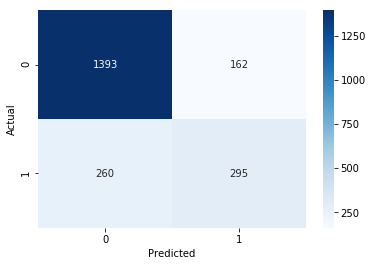

In [34]:
#CONFISUON MATRIX
def cm_logistic_reg(y_pred):
    cm_logistic_reg = confusion_matrix(y_test, y_pred)
    plt.plot(figsize=(8,5))
    sns.heatmap(cm_logistic_reg,annot=True,cmap='Blues',fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    return plt.show()
cm_logistic_reg(y_pred)

In [35]:
print(logistic_reg.score(X_train,y_train))
print(logistic_reg.score(X_test,y_test))

0.8051605038602194
0.8


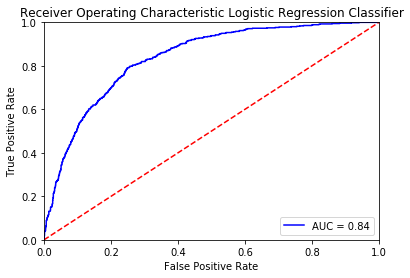

In [36]:
#ROC CURVE -- nasıl yorumlanmalı
y_proba_logistic = logistic_reg.predict_proba(X_test)
from sklearn import metrics
def roc_auc(prediction,model):
    fpr, tpr, thresholds = metrics.roc_curve(y_test,prediction)
    auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic '+str(model))
    plt.plot(fpr, tpr, color='blue', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'--',color='red')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return plt.show()

roc_auc(y_proba_logistic[:, 1],'Logistic Regression Classifier')

In [38]:
#KAPPA Statistcs -- BU VE AŞADĞIDAKİ ANALİZLERİ TÜM MODELLER İÇİN KULLAN
import sklearn
sklearn.metrics.cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None)

0.453075765486318

In [64]:
#F SCORE
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')  

0.8000000000000002

In [65]:
#ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7136757336114249

In [66]:
#MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.2

In [67]:
#Matthews correlation coefficient (MCC)
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred) 

0.45677503628418675

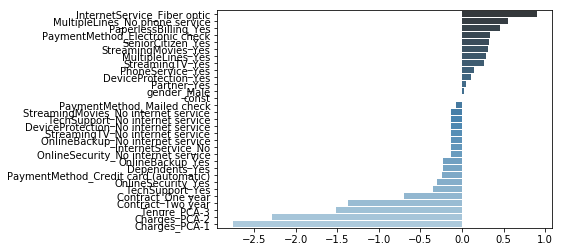

In [262]:
#To get the weights of all the variables
weights = pd.Series(logistic_reg.coef_[0],
                 index=X.columns.values)
weights_sorted=weights.sort_values(ascending = False)

sns.barplot(y=weights_sorted.index, x=weights_sorted.values, palette="Blues_d", orient='h')

In [265]:
#FITTING RANDOM FOREST TO THE TRAINING SET
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, y_train)

#PREDICTING THE TEST SET RESULTS
y_pred = random_forest.predict(X_test)

In [266]:
#MAKING THE CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm_random_forest = confusion_matrix(y_test, y_pred)
cm_random_forest

array([[1409,  146],
       [ 314,  241]], dtype=int64)

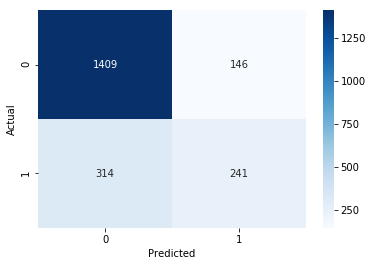

In [267]:
#CONFISUON MATRIX
def cm_random_forest(y_pred):
    cm_random_forest = confusion_matrix(y_test, y_pred)
    plt.plot(figsize=(8,5))
    sns.heatmap(cm_random_forest,annot=True,cmap='Blues',fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    return plt.show()
cm_random_forest(y_pred)

In [268]:
print(random_forest.score(X_train,y_train))
print(random_forest.score(X_test,y_test))

0.980089394555059
0.7819905213270142


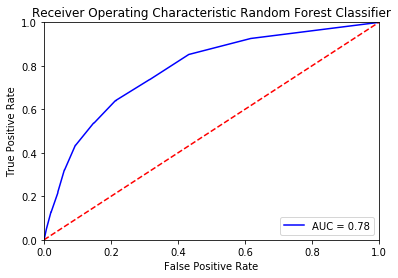

In [269]:
#ROC CURVE
y_proba_random_forest = random_forest.predict_proba(X_test)

def roc_auc(prediction,model):
    fpr, tpr, thresholds = metrics.roc_curve(y_test,prediction)
    auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic '+str(model))
    plt.plot(fpr, tpr, color='blue', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'--',color='red')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return plt.show()

roc_auc(y_proba_random_forest[:, 1],'Random Forest Classifier')